In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from modules.Utils import load_cifar10, load_cifar100
from modules.KerasCnnWithSpectralPool import CNN_Spectral_Pool
import logging
tf.get_logger().setLevel(logging.ERROR)

%matplotlib inline

# Loading CIFAR-10 data

In [2]:
xtrain, ytrain, xtest, ytest = load_cifar10(5, get_test_data=True, channels_last=False)
xtrain = np.moveaxis(xtrain, 1, -1)
print(xtrain.shape)
xtest = np.moveaxis(xtest, 1, -1)
print(xtest.shape)

file already downloaded..
getting batch 1
getting batch 2
getting batch 3
getting batch 4
getting batch 5
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
sample_size = 2 ** 14
validation_size = 2 ** 8
# Randomly sample the x train data and y train data-------------------------------------------------------------------
random_sample = np.random.choice(np.arange(xtrain.shape[0]),
                             size=sample_size, replace=False)
xtrain_random_sampled = xtrain[random_sample]
ytrain_random_sampled = ytrain[random_sample]
# Separate them to train sample and validation sample-----------------------------------------------------------------
# For train
xtrain_sample = xtrain_random_sampled[:-validation_size]
ytrain_sample = ytrain_random_sampled[:-validation_size]
# For validation
xvalid_sample = xtrain_random_sampled[-validation_size:]
yvalid_sample = ytrain_random_sampled[-validation_size:]

# Best result from manual tuning

In [4]:
M = 6
l2_norm = 1e-5
epsilon = 1e-7
learning_rate = 1e-5
num_classes = 10
epochs = 100 # 100

In [5]:
# Build the model-------------------------------------------------------------------------------------------------
    model1 = CNN_Spectral_Pool(M=M,l2_norm=l2_norm)
    for layer in model1.layers:
        layer.trainable = True
    # Instantiate hyperparameters-------------------------------------------------------------------------------------
    # Instantiate an optimizer
    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=epsilon)
    # Instantiate a loss function.
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    # Instantiate a training accuracy metric
    train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    # Instantiate a validation accuracy metric
    val_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    # Compile the model-----------------------------------------------------------------------------------------------
    # model.compile(optimizer=sgd, loss=loss_fn, metrics=train_acc_metric)
    model1.compile(optimizer=adam, loss=loss_fn, metrics=['accuracy'])
    # Fit the model---------------------------------------------------------------------------------------------------
    history1 = model1.fit(xtrain_sample, tf.one_hot(indices=ytrain_sample, depth=num_classes), validation_data=(xvalid_sample, tf.one_hot(indices=yvalid_sample, depth=num_classes)), batch_size=256, epochs=epochs, verbose=1)
    
    # Record best performances----------------------------------------------------------------------------------------
    #train_loss=history.history['loss']
    #val_loss=history.history['val_loss']
    best_train_accuracies = []
    best_valid_accuracies = []
    train_acc=history1.history['accuracy']
    valid_acc=history1.history['val_accuracy']
    best_train_accuracies.append(np.max(train_acc))
    best_valid_accuracies.append(np.max(valid_acc))
#     # Calculate time used per search round
#     end_time=time.time()
#     time_taken = "%.2f" % (end_time-start_time)
    # Print one round search result
    #print('No.{0} hyperparameters search finished!!!, it takes {1} seconds'.format(search_idx+1, time_taken))
    print('Current Best Train Accuracy: ', np.max(best_train_accuracies))
    print('Current Best Valid Accuracy: ', np.max(best_valid_accuracies))

Epoch 1/100
63/63 [==============================] - 3s 14ms/step - loss: 2.3129 - accuracy: 0.1444 - val_loss: 2.1798 - val_accuracy: 0.2422
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 2.1641 - accuracy: 0.2598 - val_loss: 2.0754 - val_accuracy: 0.2773
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 2.0645 - accuracy: 0.2881 - val_loss: 2.0375 - val_accuracy: 0.2891
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 2.0003 - accuracy: 0.3241 - val_loss: 1.9957 - val_accuracy: 0.3086
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 1.9644 - accuracy: 0.3307 - val_loss: 1.9659 - val_accuracy: 0.3594
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 1.9424 - accuracy: 0.3480 - val_loss: 1.9454 - val_accuracy: 0.3438
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 1.9123 - accuracy: 0.3549 - val_loss: 1.9301 - val_accuracy: 0.3281
Epoch 8/100


Epoch 59/100
63/63 [==============================] - 0s 4ms/step - loss: 1.4698 - accuracy: 0.5054 - val_loss: 1.5137 - val_accuracy: 0.4883
Epoch 60/100
63/63 [==============================] - 0s 4ms/step - loss: 1.4627 - accuracy: 0.5108 - val_loss: 1.5305 - val_accuracy: 0.4922
Epoch 61/100
63/63 [==============================] - 0s 4ms/step - loss: 1.4506 - accuracy: 0.5149 - val_loss: 1.5126 - val_accuracy: 0.4922
Epoch 62/100
63/63 [==============================] - 0s 4ms/step - loss: 1.4514 - accuracy: 0.5153 - val_loss: 1.5091 - val_accuracy: 0.5078
Epoch 63/100
63/63 [==============================] - 0s 4ms/step - loss: 1.4630 - accuracy: 0.5149 - val_loss: 1.5088 - val_accuracy: 0.5039
Epoch 64/100
63/63 [==============================] - 0s 4ms/step - loss: 1.4415 - accuracy: 0.5159 - val_loss: 1.5113 - val_accuracy: 0.4844
Epoch 65/100
63/63 [==============================] - 0s 4ms/step - loss: 1.4481 - accuracy: 0.5080 - val_loss: 1.5023 - val_accuracy: 0.5000
Epoch 

In [6]:
from tensorflow.keras import Model

In [7]:
model1.save_weights(filepath = "./model/10_model1")

In [ ]:
loaded_model1 = CNN_Spectral_Pool(M=M,l2_norm=l2_norm,num_classes = 10)
loaded_model1.load_weights(filepath = "./model/10_model1")

## Models with optimal parameters from hyperparameters searching

### 1. Spectral = True

In [10]:
M2 = 5
l2_norm2 = 0.0027
epsilon2 = 4e-7
learning_rate2 = 6e-5

In [11]:
# Build the model-------------------------------------------------------------------------------------------------
    model2 = CNN_Spectral_Pool(M=M2,l2_norm=l2_norm2)
    for layer in model2.layers:
        layer.trainable = True
    # Instantiate hyperparameters-------------------------------------------------------------------------------------
    # Instantiate an optimizer
    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate2, beta_1=0.9, beta_2=0.999, epsilon=epsilon2)
    # Instantiate a loss function.
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    # Instantiate a training accuracy metric
    train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    # Instantiate a validation accuracy metric
    val_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    # Compile the model-----------------------------------------------------------------------------------------------
    # model.compile(optimizer=sgd, loss=loss_fn, metrics=train_acc_metric)
    model2.compile(optimizer=adam, loss=loss_fn, metrics=['accuracy'])
    # Fit the model---------------------------------------------------------------------------------------------------
    history2 = model2.fit(xtrain_sample, tf.one_hot(indices=ytrain_sample, depth=num_classes), validation_data=(xvalid_sample, tf.one_hot(indices=yvalid_sample, depth=num_classes)), batch_size=256, epochs=epochs, verbose=1)
    
    # Record best performances----------------------------------------------------------------------------------------
    #train_loss=history.history['loss']
    #val_loss=history.history['val_loss']
    best_train_accuracies = []
    best_valid_accuracies = []
    train_acc=history2.history['accuracy']
    valid_acc=history2.history['val_accuracy']
    best_train_accuracies.append(np.max(train_acc))
    best_valid_accuracies.append(np.max(valid_acc))
#     # Calculate time used per search round
#     end_time=time.time()
#     time_taken = "%.2f" % (end_time-start_time)
    # Print one round search result
    #print('No.{0} hyperparameters search finished!!!, it takes {1} seconds'.format(search_idx+1, time_taken))
    print('Current Best Train Accuracy: ', np.max(best_train_accuracies))
    print('Current Best Valid Accuracy: ', np.max(best_valid_accuracies))

Epoch 1/100
63/63 [==============================] - 1s 9ms/step - loss: 2.4080 - accuracy: 0.1658 - val_loss: 2.1600 - val_accuracy: 0.2773
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 2.1512 - accuracy: 0.2811 - val_loss: 2.1038 - val_accuracy: 0.3164
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 2.0905 - accuracy: 0.3059 - val_loss: 2.0433 - val_accuracy: 0.3516
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 2.0234 - accuracy: 0.3489 - val_loss: 1.9983 - val_accuracy: 0.3828
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 1.9797 - accuracy: 0.3681 - val_loss: 1.9688 - val_accuracy: 0.3750
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 1.9208 - accuracy: 0.3929 - val_loss: 1.9259 - val_accuracy: 0.4102
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 1.8662 - accuracy: 0.4230 - val_loss: 1.8733 - val_accuracy: 0.4609
Epoch 8/100
6

Epoch 59/100
63/63 [==============================] - 0s 4ms/step - loss: 0.9496 - accuracy: 0.8148 - val_loss: 1.5551 - val_accuracy: 0.5234
Epoch 60/100
63/63 [==============================] - 0s 4ms/step - loss: 0.9174 - accuracy: 0.8263 - val_loss: 1.5511 - val_accuracy: 0.5117
Epoch 61/100
63/63 [==============================] - 0s 4ms/step - loss: 0.9062 - accuracy: 0.8315 - val_loss: 1.5671 - val_accuracy: 0.4961
Epoch 62/100
63/63 [==============================] - 0s 4ms/step - loss: 0.8967 - accuracy: 0.8297 - val_loss: 1.5502 - val_accuracy: 0.5156
Epoch 63/100
63/63 [==============================] - 0s 4ms/step - loss: 0.8890 - accuracy: 0.8329 - val_loss: 1.5504 - val_accuracy: 0.5273
Epoch 64/100
63/63 [==============================] - 0s 4ms/step - loss: 0.8782 - accuracy: 0.8373 - val_loss: 1.5521 - val_accuracy: 0.5312
Epoch 65/100
63/63 [==============================] - 0s 4ms/step - loss: 0.8578 - accuracy: 0.8513 - val_loss: 1.5835 - val_accuracy: 0.5547
Epoch 

In [12]:
model2.save_weights(filepath = "./model/10_model2")

In [ ]:
loaded_model2 = CNN_Spectral_Pool(M=M2,l2_norm=l2_norm2)
loaded_model2.load_weights(filepath = "./model/10_model2")

### 2. Spectral = False

In [13]:
# Build the model-------------------------------------------------------------------------------------------------
    model3 = CNN_Spectral_Pool(M=M2,l2_norm=l2_norm2,use_parameterization = False)
    for layer in model3.layers:
        layer.trainable = True
    # Instantiate hyperparameters-------------------------------------------------------------------------------------
    # Instantiate an optimizer
    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=epsilon)
    # Instantiate a loss function.
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    # Instantiate a training accuracy metric
    train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    # Instantiate a validation accuracy metric
    val_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    # Compile the model-----------------------------------------------------------------------------------------------
    # model.compile(optimizer=sgd, loss=loss_fn, metrics=train_acc_metric)
    model3.compile(optimizer=adam, loss=loss_fn, metrics=['accuracy'])
    # Fit the model---------------------------------------------------------------------------------------------------
    history3 = model3.fit(xtrain_sample, tf.one_hot(indices=ytrain_sample, depth=num_classes), validation_data=(xvalid_sample, tf.one_hot(indices=yvalid_sample, depth=num_classes)), batch_size=256, epochs=epochs, verbose=1)
    
    # Record best performances----------------------------------------------------------------------------------------
    #train_loss=history.history['loss']
    #val_loss=history.history['val_loss']
    best_train_accuracies = []
    best_valid_accuracies = []
    train_acc=history3.history['accuracy']
    valid_acc=history3.history['val_accuracy']
    best_train_accuracies.append(np.max(train_acc))
    best_valid_accuracies.append(np.max(valid_acc))
#     # Calculate time used per search round
#     end_time=time.time()
#     time_taken = "%.2f" % (end_time-start_time)
    # Print one round search result
    #print('No.{0} hyperparameters search finished!!!, it takes {1} seconds'.format(search_idx+1, time_taken))
    print('Current Best Train Accuracy: ', np.max(best_train_accuracies))
    print('Current Best Valid Accuracy: ', np.max(best_valid_accuracies))

Epoch 1/100
63/63 [==============================] - 2s 12ms/step - loss: 2.6940 - accuracy: 0.1246 - val_loss: 2.3691 - val_accuracy: 0.1719
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 2.3184 - accuracy: 0.2202 - val_loss: 2.2703 - val_accuracy: 0.2852
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 2.2381 - accuracy: 0.2828 - val_loss: 2.2330 - val_accuracy: 0.2891
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 2.1973 - accuracy: 0.2974 - val_loss: 2.1965 - val_accuracy: 0.3047
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 2.1657 - accuracy: 0.3110 - val_loss: 2.1775 - val_accuracy: 0.3398
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 2.1381 - accuracy: 0.3381 - val_loss: 2.1579 - val_accuracy: 0.3320
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 2.1165 - accuracy: 0.3450 - val_loss: 2.1391 - val_accuracy: 0.3477
Epoch 8/100


Epoch 59/100
63/63 [==============================] - 0s 4ms/step - loss: 1.6235 - accuracy: 0.5363 - val_loss: 1.7145 - val_accuracy: 0.5000
Epoch 60/100
63/63 [==============================] - 0s 4ms/step - loss: 1.6204 - accuracy: 0.5431 - val_loss: 1.7058 - val_accuracy: 0.5000
Epoch 61/100
63/63 [==============================] - 0s 4ms/step - loss: 1.5956 - accuracy: 0.5525 - val_loss: 1.7050 - val_accuracy: 0.4883
Epoch 62/100
63/63 [==============================] - 0s 4ms/step - loss: 1.6091 - accuracy: 0.5429 - val_loss: 1.6992 - val_accuracy: 0.4883
Epoch 63/100
63/63 [==============================] - 0s 4ms/step - loss: 1.6026 - accuracy: 0.5470 - val_loss: 1.7048 - val_accuracy: 0.4805
Epoch 64/100
63/63 [==============================] - 0s 4ms/step - loss: 1.5892 - accuracy: 0.5527 - val_loss: 1.6898 - val_accuracy: 0.4844
Epoch 65/100
63/63 [==============================] - 0s 4ms/step - loss: 1.5981 - accuracy: 0.5485 - val_loss: 1.6915 - val_accuracy: 0.4844
Epoch 

In [34]:
#model3.save_weights(filepath = "./model/10_model3")

In [ ]:
loaded_model3 = CNN_Spectral_Pool(M=M2,l2_norm=l2_norm2,use_spectral_parameterization = False)
loaded_model3.load_weights(filepath = "./model/10_model3")

#  Test set

In [14]:
results = model2.evaluate(xtest, tf.one_hot(indices=ytest, depth=num_classes), batch_size=256)

40/40 [==============================] - 0s 4ms/step - loss: 1.7172 - accuracy: 0.4948


# Plot

### Training and validation plot

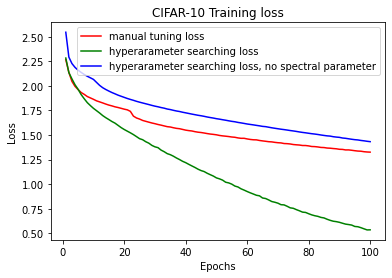

In [15]:
# loss plot
loss_train1 = history1.history['loss']
loss_train2 = history2.history['loss']
loss_train3 = history3.history['loss']

total_epochs = range(1,epochs+1)
plt.plot(total_epochs, loss_train1, 'r', label='manual tuning loss')
plt.plot(total_epochs, loss_train2, 'g', label='hyperarameter searching loss')
plt.plot(total_epochs, loss_train3, 'b', label='hyperarameter searching loss, no spectral parameter')
plt.title('CIFAR-10 Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

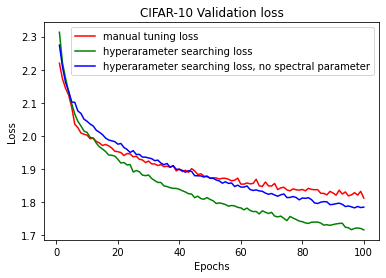

In [17]:
# validation loss plot
loss_val1 = history1.history['val_loss']
loss_val2 = history2.history['val_loss']
loss_val3 = history3.history['val_loss']

total_epochs = range(1,epochs+1)
plt.plot(total_epochs, loss_val1, 'r', label='manual tuning loss')
plt.plot(total_epochs, loss_val2, 'g', label='hyperarameter searching loss')
plt.plot(total_epochs, loss_val3, 'b', label='hyperarameter searching loss, no spectral parameter')
plt.title('CIFAR-10 Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Comparison plot

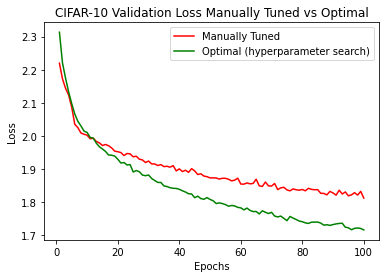

In [18]:
# manually tuned vs optimal

total_epochs = range(1,epochs+1)
plt.plot(total_epochs, loss_val1, 'r', label='Manually Tuned')
plt.plot(total_epochs, loss_val2, 'g', label='Optimal (hyperparameter search)')
plt.title('CIFAR-10 Validation Loss Manually Tuned vs Optimal')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

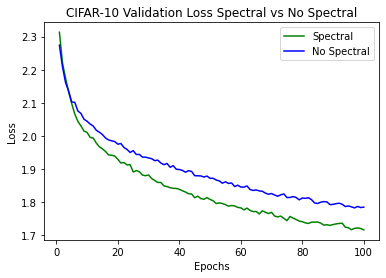

In [19]:
# spectral vs no spectral, both optimal

total_epochs = range(1,epochs+1)
plt.plot(total_epochs, loss_val2, 'g', label='Spectral')
plt.plot(total_epochs, loss_val3, 'b', label='No Spectral')
plt.title('CIFAR-10 Validation Loss Spectral vs No Spectral')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
import csv
import pandas as pd


In [17]:
c100 = pd.read_csv('c100.csv', header = None)
c100 = c100.iloc[:,-1]
del c100[0]
c100

1      4.761496
2      4.582957
3      4.557647
4      4.531505
5      4.506532
         ...   
96     3.426568
97     3.416601
98     3.407190
99     3.397698
100    3.389325
Name: 1, Length: 100, dtype: float64

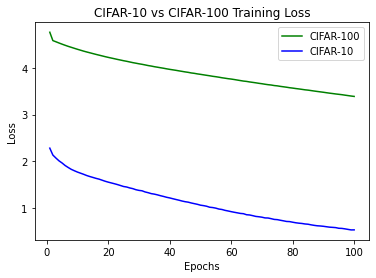

In [18]:
total_epochs = range(1,epochs+1)
plt.plot(total_epochs, c100, 'g', label='CIFAR-100')
plt.plot(total_epochs, loss_train2, 'b', label='CIFAR-10')
plt.title('CIFAR-10 vs CIFAR-100 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()